# Data mining on *Legionella* Outbreaks


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

%matplotlib inline

## Abstract

## Introduction
Legionellae are bacteria found in water systems, first discovered in 1976, in Philadelphia, that can originate Legionnaire's Disease (LD), a form of pneumonia, and Pontiac Fever (PF), a less dangerous illness that does not cause pneumonia. There are more than 59 species and 70 serogroups of this bacteria. Nevertheless, Legionella pneumophila causes 90% of the cases of legionellosis and, of those, Legionella pneumophila serogroup 1 causes 80%. [1]

Legionellae are gram-negative rods that, apart from lakes, rivers and other natural water systems, can also occur in building water systems, especially in hot water and cooling towers/air-conditioning systems as they provide the optimal conditions for its development. These include temperatures between 20 and 50 degrees Celsius, pH between 5.5 and 9.2, the presence of L-Cysteine-HCL and iron salts, as wells as biofilms. Legionellae are also most prevalent in dead legs or other places with stagnant water.

These conditions favour the growth of protozoa, which Legionellae use to replicate intracellularly. Moreover, biofilms provide a stable environment and protect Legionellae from hazardous conditions and some treatments used for water systems cleaning. Thus, systems with more protozoa and biofilms have a higher risk of Legionella outbreak.

Furthermore, LD is more frequent in people over 50 years, mostly males, and people whose health is, in some way, impaired. For example, smokers, cancer patients and patients that use immunosuppression medication.

This piece of work intends to confirm, based on reliable articles, that the main risks presented in the bibliography are coincident with those found in outbreaks reports. Moreover, it tries to establish a clear relationship between the presence of biofilms and outbreaks' occurrence.

To achieve this, and as there were no available datasets regarding Legionella, the construction of a database was critical. Once it had a significant amount of data, an extensive analysis was conducted using the Python programming language.



## Database Construction

This work depended on having solid data, with as many reported outbreaks as possible, yet, as referred, there were no available datasets as such.  Also, as not all available information is reliable, only data from published articles were selected.

Therefore, a renowned search platform, PubMed, was used to search for relevant articles. These were gathered in an Excel Sheet, alongside their most relevant data.  A set of chosen keywords that summarized the focus of this work, such as "Legionella Outbreak" and "Legionella Outbreak Biofilms", was used as input.

In [2]:
# Read Articles Dataset
articles_data = pd.read_excel('ArticlesStudy.xlsx', sheet_name = "Folha2")
articles_data.head()

,Title,Relevance,Source,Key Words,Considers Biofilms
0,An outbreak of Legionnaires' disease associate...,Outbreak,PubMed,"""Legionella Outbreak""",No
1,1974 OUTBREAK OF LEGIONNAIRES'DISEASE DIAGNOSE...,Outbreak,PubMed,"""Legionella Outbreak""",No
2,Legionnaires' disease. Description of an epide...,Outbreak,PubMed,"""Legionella Outbreak""",No
3,The Stafford outbreak of Legionnaires’ disease.,Outbreak,PubMed,"""Legionella Outbreak""",No
4,"Legionnaires’ disease outbreak in Murcia, Spain.",Outbreak,PubMed,"""Legionella Outbreak""",No


On a first stage, the articles were analysed and separated into groups based on their relevance, as seen below.

In [3]:
sources = ["PubMed"]

for source in sources:
    #Print Source
    print('Source:', source)
    
    source_data = articles_data[articles_data["Source"] == source]
    
    # Print number of articles from Source
    print('   Total number of articles: ', source_data.shape[0])

    # Print number of outbreak articles form Source
    print('   Number of articles related to outbreaks: ', source_data[source_data["Relevance"] == "Outbreak"].shape[0])
    
    #Print percentage of relevant articles
    print('   Percentage of articles related to outbreaks: ', source_data[source_data["Relevance"] == "Outbreak"].shape[0] / source_data.shape[0] * 100, '%')
    print()
    
    source_relevance_group = pd.DataFrame(source_data.groupby("Relevance").size().reset_index(name = "Number of Articles"))
    source_relevance_group = source_relevance_group.sort_values(by = ["Number of Articles"], ascending = False)
    display(HTML(source_relevance_group.to_html(index=False)))
    
    print()
    print("---------------------------------------------------------------------------")

Source: PubMed
   Total number of articles:  41
   Number of articles related to outbreaks:  19
   Percentage of articles related to outbreaks:  46.34146341463415 %



Relevance,Number of Articles
Outbreak,19
Environment Study,9
Genomic Analysis,5
Not published yet,2
Isolation Techniques,1
Microbiology,1
Not relevant,1
Remediation,1
Single Case,1
Treatment,1



---------------------------------------------------------------------------


The number of articles regarding biofilms should also be analyzed.

In [4]:
sources = ["PubMed"]

for source in sources:
    #Print Source
    print('Source:', source)
    
    source_data = articles_data[articles_data["Source"] == source]
    
    # Print number of articles from Source
    print('Total number of articles: ', source_data.shape[0])
    
    source_biofilm_data = source_data[source_data["Considers Biofilms"] == "Yes"]
    
    # Print number of outbreak articles form Source
    print('Number of articles that consider biofilms: ', source_biofilm_data.shape[0])
    
    #Print percentage of relevant articles
    print('Percentage of articles that consider biofilms: ', source_data[source_data["Considers Biofilms"] == "Yes"].shape[0] / source_data.shape[0] * 100, '%')
    
    # Print number of outbreak articles form Source
    source_biofilm_out_data = source_biofilm_data[source_biofilm_data["Relevance"] == "Outbreak"]
    print('Number of articles that consider biofilms and outbreaks: ', source_biofilm_out_data.shape[0])
    print()
    
    source_relevance_group = pd.DataFrame(source_data.groupby("Considers Biofilms").size().reset_index(name = "Number of Articles"))
    source_relevance_group = source_relevance_group.sort_values(by = ["Number of Articles"], ascending = False)
    display(HTML(source_relevance_group.to_html(index=False)))
    
    print()
    print("--------------------------------------------------------------------------")

Source: PubMed
Total number of articles:  41
Number of articles that consider biofilms:  15
Percentage of articles that consider biofilms:  36.58536585365854 %
Number of articles that consider biofilms and outbreaks:  7



Considers Biofilms,Number of Articles
No,19
Yes,15



--------------------------------------------------------------------------


## Database Analysis

A sample of the collected data is represented in the table below. 

As the source is not relevant in this analysis, this column will be deleted from the DataFrame.

In [5]:
# Leitura do dataset
raw_data = pd.read_excel('ArticlesStudy.xlsx')
raw_data.head()

,Year,City,Country,Place,Season,Cases,Deaths,Mean Age,Strain,Cause,Treatment,Considers Biofilms,Source
0,1974,Philadelphia,USA,Hotel,Spring/Summer,20,2,63,Unknown,Cooling Tower,Not mentioned,No,"Terranova, William, MitchellL Cohen, and David..."
1,1976,Philadelphia,USA,Hotel,Spring/Summer,182,29,55,LP,Cooling Tower,Not mentioned,No,"Fraser, D.W., et al. (1978). Legionnaires' dis..."
2,1978,Memphis,USA,Hospital,Spring/Summer,44,7,Unknown,LP,Cooling Tower,No treatment,No,"Dondero Jr, Timothy J., et al. ""An outbreak of..."
3,1985,Stafford,England,Hospital,Spring/Summer,68,22,62,LP1,Cooling Tower,Chlorination,No,"O'mahony, M. C., et al. ""The Stafford outbreak..."
4,2001,Murcia,Spain,Community,Spring/Summer,449,6,> 65,LP1,Cooling Tower,Inadequate treatment,No,"García-Fulgueiras, Ana, et al. ""Legionnaires’ ..."


In [6]:
# Retirar a coluna Source
raw_data = raw_data.drop('Source', 1)
raw_data.head()

,Year,City,Country,Place,Season,Cases,Deaths,Mean Age,Strain,Cause,Treatment,Considers Biofilms
0,1974,Philadelphia,USA,Hotel,Spring/Summer,20,2,63,Unknown,Cooling Tower,Not mentioned,No
1,1976,Philadelphia,USA,Hotel,Spring/Summer,182,29,55,LP,Cooling Tower,Not mentioned,No
2,1978,Memphis,USA,Hospital,Spring/Summer,44,7,Unknown,LP,Cooling Tower,No treatment,No
3,1985,Stafford,England,Hospital,Spring/Summer,68,22,62,LP1,Cooling Tower,Chlorination,No
4,2001,Murcia,Spain,Community,Spring/Summer,449,6,> 65,LP1,Cooling Tower,Inadequate treatment,No


In [7]:
# Imprimir o número de casos em estudo
print('Number of studied cases: ', raw_data.shape[0])

Number of studied cases:  51


The analysis will start by representing the number of cases and deaths in function of time. The number of cases is plotted in the chart below, and the number of deaths is also represented, in darker colour.

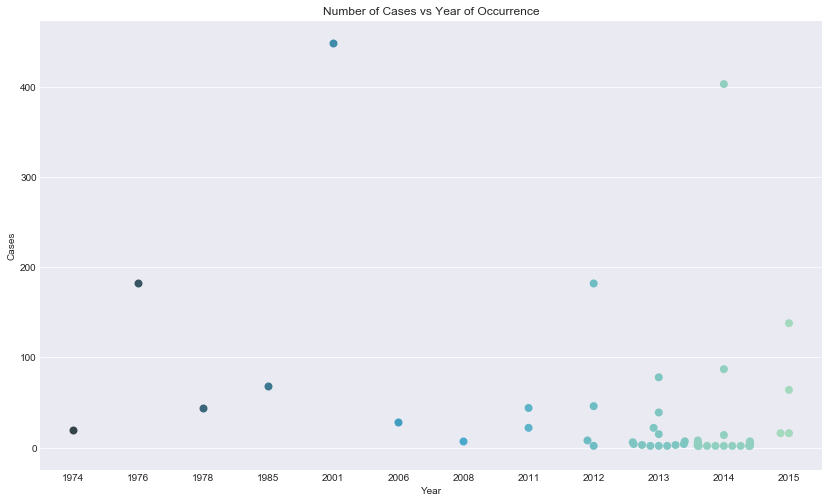

In [43]:
a4_dims = (14, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.set_style("darkgrid")

sns.swarmplot(x = 'Year', 
            y = 'Cases', 
            data = raw_data, 
            palette = 'GnBu_d',
            size = 8,
            edgecolor = "black")

plt.title('Number of Cases vs Year of Occurrence')

plt.savefig("Year.png")

C:\Users\Inês\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


    Year  Deaths
0   1974    2.00
1   1976   29.00
2   1978    7.00
3   1985   22.00
4   2001    6.00
5   2006    1.00
6   2008    0.00
7   2011    6.00
8   2012    3.25
9   2013    0.75
10  2014    1.00
11  2015    4.25


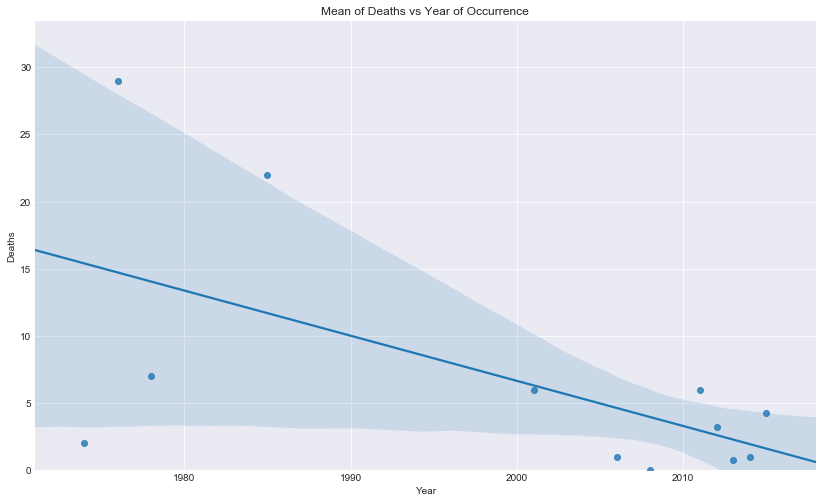

In [42]:
a4_dims = (14, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.set_style("darkgrid")

raw_data_clean = raw_data[raw_data["Deaths"] != "Unknown"]
death_data = raw_data_clean[["Year","Deaths"]]
death_data["Deaths"] = pd.to_numeric(death_data["Deaths"])
mean_death_data = death_data.groupby("Year")["Deaths"].mean().reset_index()

print(mean_death_data)

sns.regplot(x = 'Year', 
            y = 'Deaths', 
            data = mean_death_data)

plt.title('Mean of Deaths vs Year of Occurrence')
plt.ylim(0, None)

plt.savefig("Death.png")

In [45]:
raw_data["Cases"].mean()

41.0

In [10]:
# Agrupar por estação do ano
raw_data.groupby('Season').size()

Season
Autumn/Winter      13
Long-term study     1
Spring/Summer      37
dtype: int64

In [11]:
# Agrupar por causa
raw_data.groupby('Cause').size()

Cause
Air Conditioner     1
Cooling Tower      17
Fountain            1
Undefined           3
Water System       29
dtype: int64

In [12]:
# Agrupar por local
print(raw_data.groupby('Place').size())

Place
Assisted Living Facility     9
Casino                       1
Community                   16
Hospital                    13
Hotel                        7
Household                    2
Prison                       3
dtype: int64


In [13]:
# Agrupar por estirpe
raw_data.groupby('Strain').size()

Strain
LP          8
LP1        40
Unknown     2
dtype: int64

In [47]:
# Agrupar por estirpe
raw_data.groupby('Treatment').size()

Treatment
Chlorination                2
Inadequate thresholding     1
Inadequate treatment        6
No treatment                2
Not mentioned              40
dtype: int64

In [14]:
# Agrupar por idade
raw_data.groupby('Mean Age').size()

Mean Age
55          2
56          2
57          1
58          3
62          1
63          1
64          1
65          2
67          1
> 65        3
Unknown    34
dtype: int64

In [15]:
# Agrupar por consideração de biofilmes
raw_data.groupby('Considers Biofilms').size()

Considers Biofilms
No     44
Yes     7
dtype: int64

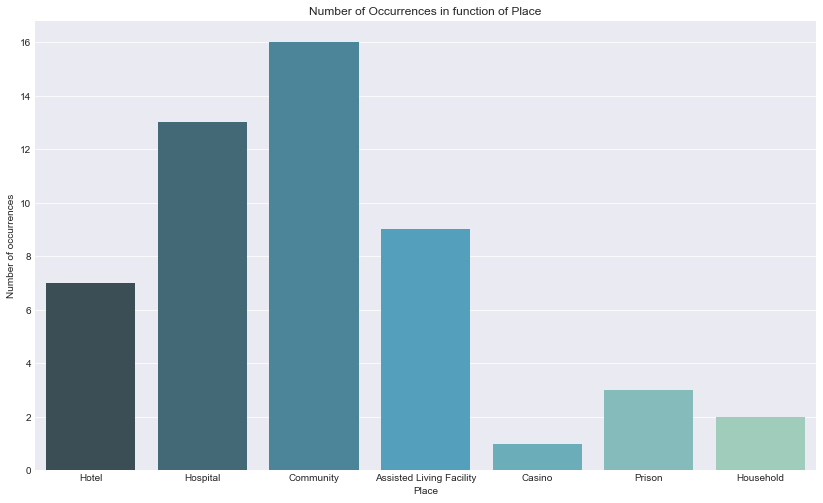

In [41]:
# Representar Ocorrências em função do local
fig, ax = plt.subplots(figsize = a4_dims)
sns.countplot(x = 'Place', data = raw_data, palette = 'GnBu_d')
plt.ylabel('Number of occurrences')
plt.title('Number of Occurrences in function of Place')

plt.savefig("Places.png")

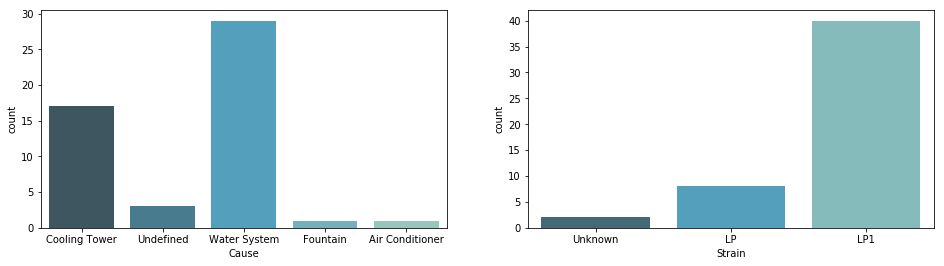

In [20]:
# Representar Ocorrências em função da causa e estirpe
compare_dim = (16, 4)
fig, ax = plt.subplots(1, 2, figsize = compare_dim)

sns.countplot(x = 'Cause', data = raw_data, palette = 'GnBu_d', ax = ax[0])
sns.countplot(x = 'Strain', data = raw_data, palette = 'GnBu_d', ax = ax[1])

# References

[] - http://pandas.pydata.org/

[1] - Springston, John P., and Liana Yocavitch. "Existence and control of Legionella bacteria in building water systems: A review." Journal of occupational and environmental hygiene 14.2 (2017): 124-134.

[2] - 